In [47]:
import os
import numpy as np
import matplotlib.pyplot as plt
import keras 
from keras.models import Sequential
from keras.optimizers import Adam
from sklearn.utils import shuffle
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
import pandas as pd
import ntpath
import random

In [65]:
columns = ['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed']
data = pd.read_csv('driving_log.csv', names=columns)
pd.set_option('display.max_colwidth', -1)
data.head()

,center,left,right,steering,throttle,reverse,speed
0,C:\Users\student\Desktop\dataset\IMG\center_2019_05_03_14_05_29_767.jpg,C:\Users\student\Desktop\dataset\IMG\left_2019_05_03_14_05_29_767.jpg,C:\Users\student\Desktop\dataset\IMG\right_2019_05_03_14_05_29_767.jpg,0.0,0.0,0.0,0.000009
1,C:\Users\student\Desktop\dataset\IMG\center_2019_05_03_14_05_29_841.jpg,C:\Users\student\Desktop\dataset\IMG\left_2019_05_03_14_05_29_841.jpg,C:\Users\student\Desktop\dataset\IMG\right_2019_05_03_14_05_29_841.jpg,0.0,0.0,0.0,0.000027
2,C:\Users\student\Desktop\dataset\IMG\center_2019_05_03_14_05_29_912.jpg,C:\Users\student\Desktop\dataset\IMG\left_2019_05_03_14_05_29_912.jpg,C:\Users\student\Desktop\dataset\IMG\right_2019_05_03_14_05_29_912.jpg,0.0,0.0,0.0,0.000003
3,C:\Users\student\Desktop\dataset\IMG\center_2019_05_03_14_05_29_985.jpg,C:\Users\student\Desktop\dataset\IMG\left_2019_05_03_14_05_29_985.jpg,C:\Users\student\Desktop\dataset\IMG\right_2019_05_03_14_05_29_985.jpg,0.0,0.0,0.0,0.000005
4,C:\Users\student\Desktop\dataset\IMG\center_2019_05_03_14_05_30_060.jpg,C:\Users\student\Desktop\dataset\IMG\left_2019_05_03_14_05_30_060.jpg,C:\Users\student\Desktop\dataset\IMG\right_2019_05_03_14_05_30_060.jpg,0.0,0.0,0.0,0.000019


In [66]:
def path_leaf(path):
    head, tail = ntpath.split(path)
    return tail

data['center'] = data['center'].apply(path_leaf)
data['left'] = data['left'].apply(path_leaf)
data['right'] = data['right'].apply(path_leaf)
data.head()


,center,left,right,steering,throttle,reverse,speed
0,center_2019_05_03_14_05_29_767.jpg,left_2019_05_03_14_05_29_767.jpg,right_2019_05_03_14_05_29_767.jpg,0.0,0.0,0.0,0.000009
1,center_2019_05_03_14_05_29_841.jpg,left_2019_05_03_14_05_29_841.jpg,right_2019_05_03_14_05_29_841.jpg,0.0,0.0,0.0,0.000027
2,center_2019_05_03_14_05_29_912.jpg,left_2019_05_03_14_05_29_912.jpg,right_2019_05_03_14_05_29_912.jpg,0.0,0.0,0.0,0.000003
3,center_2019_05_03_14_05_29_985.jpg,left_2019_05_03_14_05_29_985.jpg,right_2019_05_03_14_05_29_985.jpg,0.0,0.0,0.0,0.000005
4,center_2019_05_03_14_05_30_060.jpg,left_2019_05_03_14_05_30_060.jpg,right_2019_05_03_14_05_30_060.jpg,0.0,0.0,0.0,0.000019


[-1.   -0.92 -0.84 -0.76 -0.68 -0.6  -0.52 -0.44 -0.36 -0.28 -0.2  -0.12
 -0.04  0.04  0.12  0.2   0.28  0.36  0.44  0.52  0.6   0.68  0.76  0.84
  0.92  1.  ]


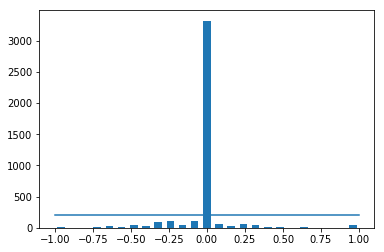

In [67]:
num_bins = 25
sample_per_bin = 200
hist, bins = np.histogram(data['steering'], num_bins)
print(bins)
center = (bins[:-1] + bins[1:]) * 0.5
plt.bar(center, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (sample_per_bin, sample_per_bin))


In [69]:
print('total data: ', len(data))
remove_list = []
for j in range(num_bins):
    list_ = []
    for i in range(len(data['steering'])):
        if data['steering'][i] >= bins[j] and data['steering'][i] <= bins[j+1]:
            list_.append(i)
    list_ = shuffle(list_)
    list_ = list_[sample_per_bin:]
    remove_list.extend(list_)
    
print('removed: ', len(remove_list))
data.drop(data.index[remove_list], inplace=True)
print('remaining: ', len(data))

hist, _ = np.histogram(data['steering'], num_bins)
plt.bar(center, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (sample_per_bin, sample_per_bin))

total data:  970


KeyError: 2